In [42]:
import urllib.parse, matplotlib, re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from typing import List

import sklearn
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Data Analysis

In [33]:
df = pd.read_csv("clean_data.csv", low_memory=False)

print(f"Dataset has {df.shape[0]} columns and {df.shape[1]} rows.")


Dataset has 18030 columns and 26 rows.


### Missing Values

In [34]:
df_houses = df[df['Type of property'] == 'house']
df_apartments = df[df['Type of property'] == 'apartment']

all_missing_value_df = df.isnull().mean() * 100
houses_missing_value_df = df_houses.isnull().mean() * 100
apartments_missing_value_df = df_apartments.isnull().mean() * 100

print("all_missing_value")
print(all_missing_value_df)
print("_"*30)
print("houses_missing_value")
print(houses_missing_value_df)
print("_"*30)
print("apartments_missing")
print(apartments_missing_value_df)

all_missing_value
id                            0.00
Locality                      0.00
Zip                           0.00
Province                      0.00
Type of property              0.00
Subtype of property           0.00
Type of sale                  0.00
Price                         0.00
Price of square meter         0.00
Building condition           15.77
Building Cond. values         0.00
Number of facades            23.31
Number of rooms               1.84
Living area                   0.00
Furnished                     0.00
Fully equipped kitchen       21.81
Kitchen values                0.00
Surface of the land          49.83
Primary energy consumption    0.00
Energy efficiency             0.00
Terrace                       0.00
Terrace surface              23.89
Garden                        0.00
Garden surface               12.25
Open fire                     0.00
Swimming pool                 0.00
dtype: float64
______________________________
houses_missing_value
id   

In [35]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64', 'bool']
df_houses = df[df['Type of property'] == 'house']
df_apartments = df[df['Type of property'] == 'apartment']
apartdf = df_apartments.select_dtypes(include=numerics)
noIdApartDf = apartdf.loc[:, ~apartdf.columns.isin(['id'])]
noIdApartDf.corr(method = 'spearman')

,Zip,Price,Price of square meter,Building Cond. values,Number of facades,Number of rooms,Living area,Furnished,Kitchen values,Surface of the land,Primary energy consumption,Energy efficiency,Terrace,Terrace surface,Garden,Garden surface,Open fire,Swimming pool
Zip,1.00,-0.11,-0.14,-0.00,0.03,-0.03,-0.08,0.08,-0.17,NaN,-0.10,-0.03,-0.02,-0.06,0.10,-0.03,-0.06,-0.01
Price,-0.11,1.00,0.62,0.19,0.05,0.52,0.64,-0.00,0.25,NaN,-0.27,0.10,0.25,0.40,0.10,0.07,0.10,0.06
Price of square meter,-0.14,0.62,1.00,0.19,-0.04,-0.01,-0.10,0.19,0.21,NaN,-0.19,0.11,0.12,0.17,0.03,-0.01,0.03,0.06
Building Cond. values,-0.00,0.19,0.19,1.00,-0.03,0.03,0.07,0.06,0.34,NaN,-0.06,0.16,0.08,0.11,-0.03,0.03,-0.00,0.06
Number of facades,0.03,0.05,-0.04,-0.03,1.00,0.11,0.13,-0.08,0.01,NaN,-0.11,-0.03,0.08,0.16,0.07,0.06,0.03,0.03
Number of rooms,-0.03,0.52,-0.01,0.03,0.11,1.00,0.75,-0.10,0.08,NaN,-0.06,0.05,0.15,0.25,0.05,0.05,0.07,0.03
Living area,-0.08,0.64,-0.10,0.07,0.13,0.75,1.00,-0.18,0.14,NaN,-0.15,0.02,0.21,0.38,0.10,0.10,0.11,0.05
Furnished,0.08,-0.00,0.19,0.06,-0.08,-0.10,-0.18,1.00,0.01,NaN,0.05,0.03,-0.05,-0.10,-0.03,-0.05,-0.03,0.03
Kitchen values,-0.17,0.25,0.21,0.34,0.01,0.08,0.14,0.01,1.00,NaN,-0.11,0.08,0.16,0.22,-0.01,0.05,0.01,0.04
Surface of the land,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
housedf = df_houses.select_dtypes(include=numerics)
noIdHouseDf = housedf.loc[:, ~housedf.columns.isin(['id', 'Zip'])]
noIdHouseDf.corr(method = 'spearman')

,Price,Price of square meter,Building Cond. values,Number of facades,Number of rooms,Living area,Furnished,Kitchen values,Surface of the land,Primary energy consumption,Energy efficiency,Terrace,Terrace surface,Garden,Garden surface,Open fire,Swimming pool
Price,1.00,0.66,0.27,0.30,0.53,0.71,0.01,0.19,0.42,-0.33,0.26,0.14,0.19,0.06,0.11,0.19,0.26
Price of square meter,0.66,1.00,0.26,0.20,0.09,0.02,0.04,0.21,0.17,-0.24,0.21,0.14,0.15,0.07,0.08,0.09,0.18
Building Cond. values,0.27,0.26,1.00,0.07,0.08,0.14,0.03,0.29,0.03,-0.31,0.34,0.17,0.23,0.04,0.08,0.03,0.13
Number of facades,0.30,0.20,0.07,1.00,0.13,0.23,0.00,0.06,0.72,0.04,-0.01,0.08,0.15,0.07,0.21,0.20,0.22
Number of rooms,0.53,0.09,0.08,0.13,1.00,0.65,0.01,0.06,0.25,-0.14,0.16,0.07,0.13,0.04,0.10,0.10,0.16
Living area,0.71,0.02,0.14,0.23,0.65,1.00,-0.01,0.09,0.42,-0.21,0.16,0.08,0.14,0.01,0.08,0.17,0.22
Furnished,0.01,0.04,0.03,0.00,0.01,-0.01,1.00,0.03,-0.02,-0.02,-0.01,0.01,0.01,-0.00,0.01,-0.01,0.04
Kitchen values,0.19,0.21,0.29,0.06,0.06,0.09,0.03,1.00,0.04,-0.13,0.15,0.20,0.24,0.07,0.08,0.03,0.11
Surface of the land,0.42,0.17,0.03,0.72,0.25,0.42,-0.02,0.04,1.00,0.04,-0.00,0.08,0.17,0.16,0.34,0.20,0.25
Primary energy consumption,-0.33,-0.24,-0.31,0.04,-0.14,-0.21,-0.02,-0.13,0.04,1.00,-0.52,-0.10,-0.14,0.01,0.02,-0.04,-0.10


### Removing Outliers

In [44]:
print("House data min (with outliers): ",housedf['Price'].min())
print("House data max (with outliers): ",housedf['Price'].max())

# Remove outliers
def remove_outliers(df: pd.DataFrame, columns: List[str], n_std: int) -> pd.DataFrame:
    for col in columns:
        mean = df[col].mean()
        sd = df[col].std()
        
        df = df[(df[col] <= mean+(n_std*sd))]
        
    return df

new_housedf = remove_outliers(housedf, ['Price'], 4)

print("House data min (without outliers): ", new_housedf['Price'].min())
print("House data max (without outliers): ", new_housedf['Price'].max())

House data min (with outliers):  10000
House data max (with outliers):  11000000
House data min (without outliers):  10000
House data max (without outliers):  3200000


In [46]:
print("Apartment data min (with outliers): ",apartdf['Price'].min())
print("Apartment data max (with outliers): ",apartdf['Price'].max())

new_apartdf = remove_outliers(apartdf, ['Price'], 3)

print("Apartment data min (without outliers): ",new_apartdf['Price'].min())
print("Apartment data max (without outliers): ",new_apartdf['Price'].max())

Apartment data min (with outliers):  10000
Apartment data max (with outliers):  8100000
Apartment data min (without outliers):  10000
Apartment data max (without outliers):  1890000


### How are variables correlated to each other? (Why?)

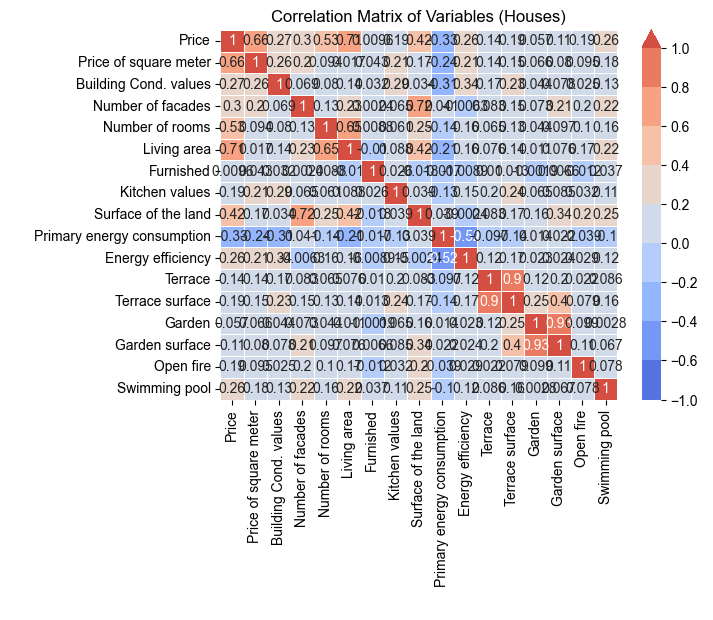

In [40]:
corr_matrix = noIdHouseDf.corr(method='spearman')

colors = sns.color_palette('coolwarm', 10)
levels = [-1.0, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
cmap, norm = matplotlib.colors.from_levels_and_colors(levels, colors, extend="max")
sns.heatmap(corr_matrix, cmap = cmap, annot=True, linewidths=.5, norm=norm)

plt.title('Correlation Matrix of Variables (Houses)')
sns.set (rc = {'figure.figsize':(25, 25)})
plt.show()

<Axes: xlabel='Province', ylabel='Price in Euros'>

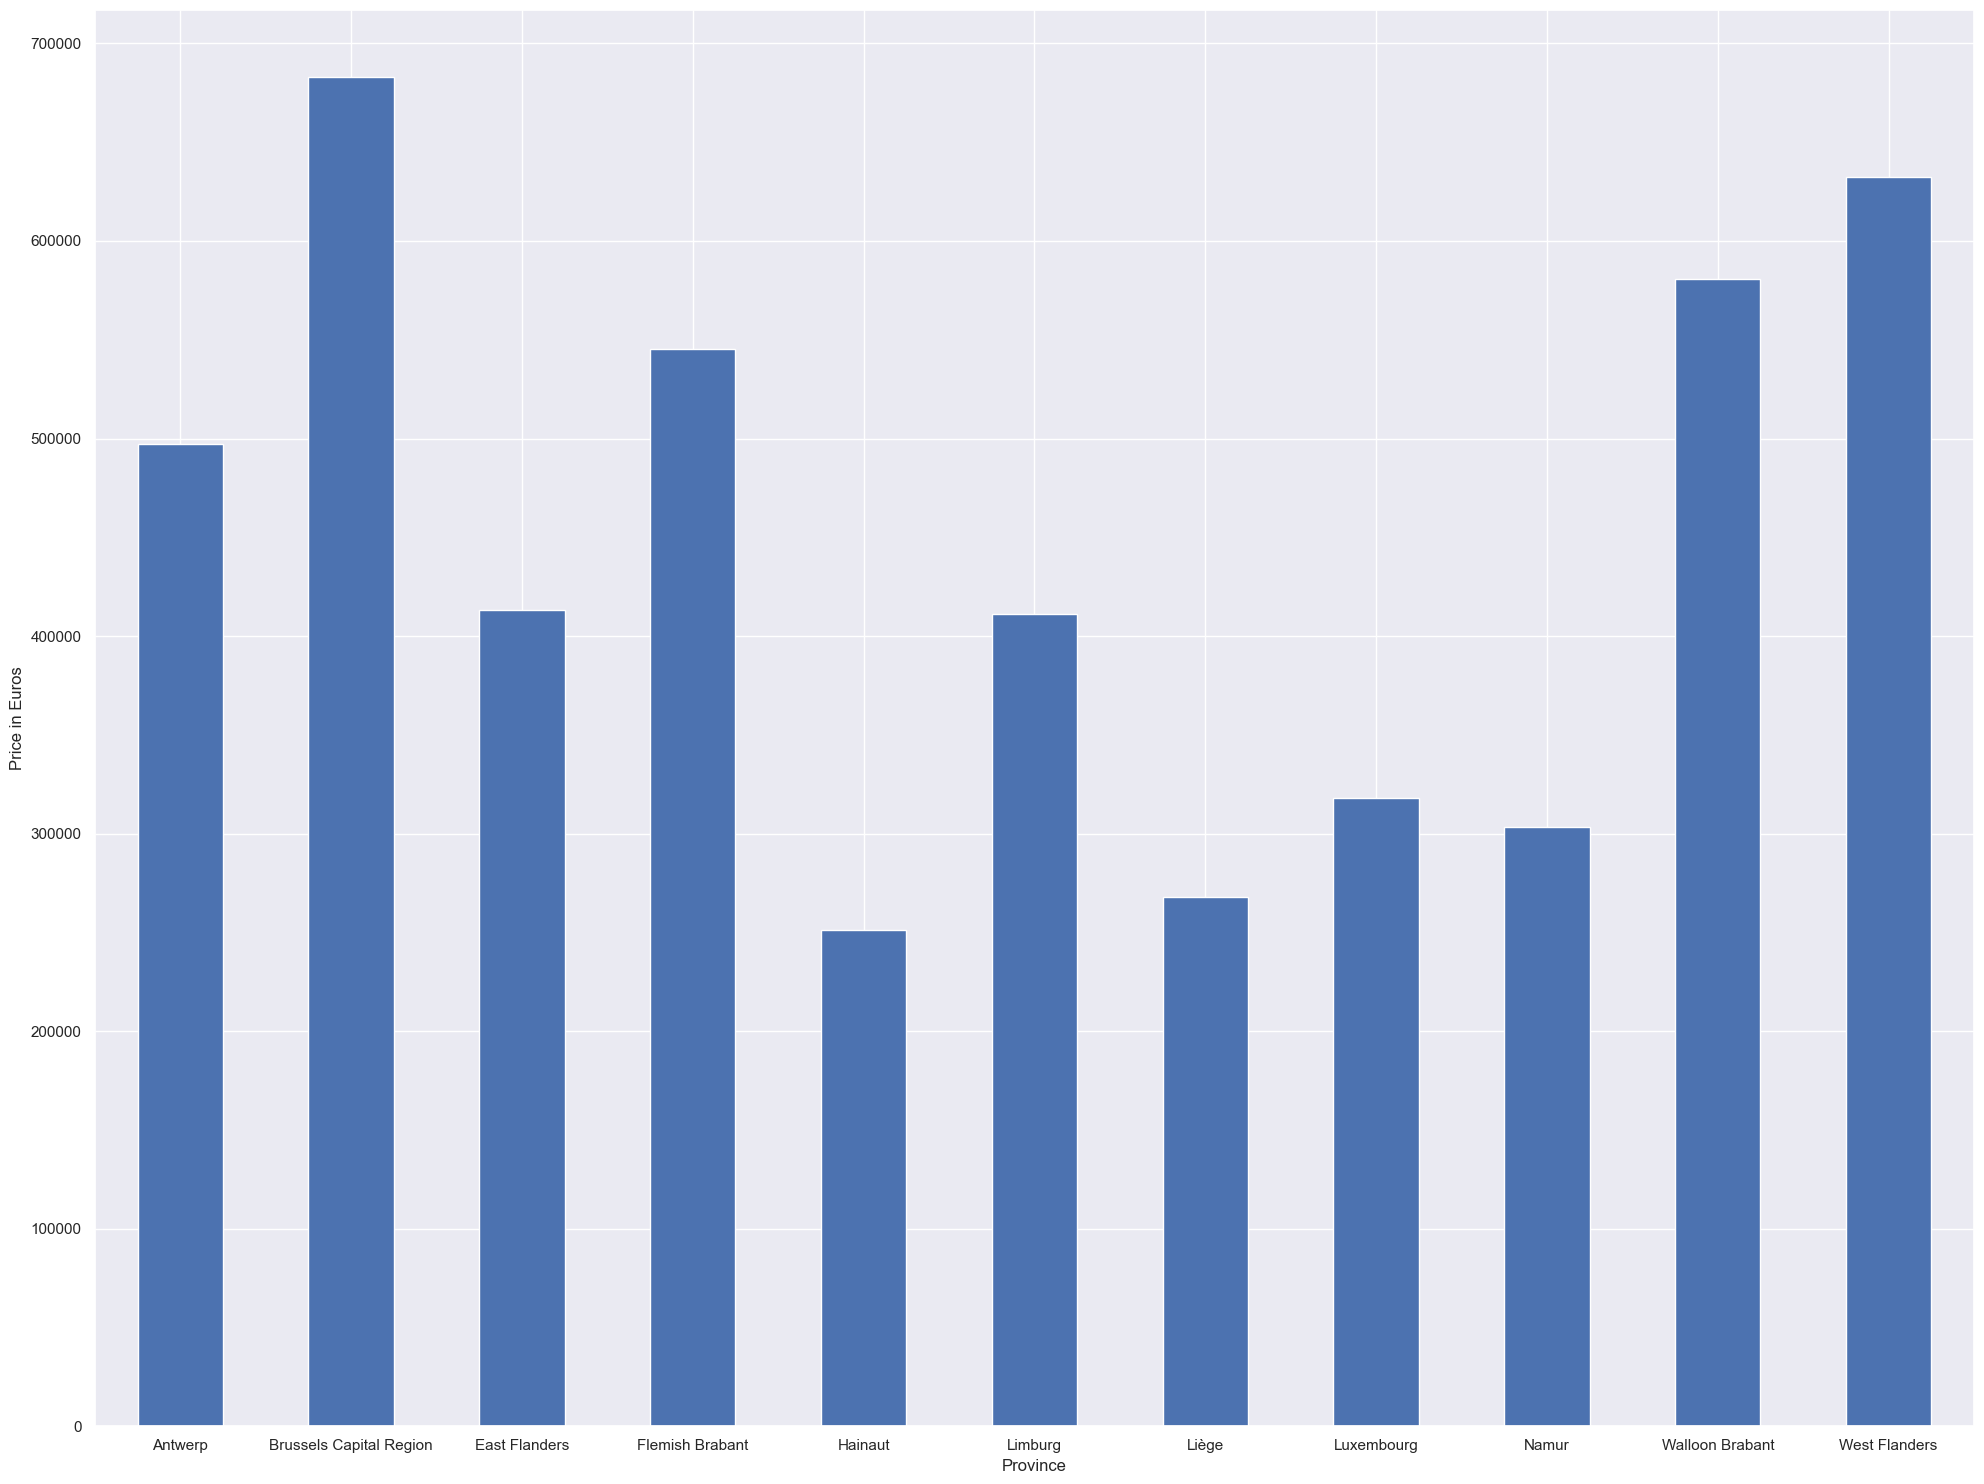

In [41]:
plt.rcParams["figure.figsize"] = [20.00, 15.00]
plt.rcParams["figure.autolayout"] = True
df.groupby('Province')['Price'].mean().plot(kind = 'bar',
       rot = 0,
       xlabel = 'Province',
       ylabel = 'Price in Euros')

In [7]:
# Define provinces in each region
flanders_provinces = ['Flemish Brabant','Antwerp','Limburg','West Flanders','East Flanders']
wallonia_provinces = ['Walloon Brabant','Liège','Namur','Hainaut','Luxembourg']
brussels_provinces = ['Brussels Capital Region']

df_flanders = df[df['Province'].isin(flanders_provinces)]
df_wallonia = df[df['Province'].isin(wallonia_provinces)]
df_brussels = df[df['Province'].isin(brussels_provinces)]
df_flanders

,Locality,Zip,Province,Type of property,Subtype of property,Type of sale,Price,Price of square meter,Building condition,Building Cond. values,...,Kitchen values,Surface of the land,Primary energy consumption,Energy_classes,Terrace,Terrace surface,Garden,Garden surface,Open fire,Swimming pool
0,liedekerke,1770,Flemish Brabant,house,house,for sale,349000,1938.89,As new,4,...,3,256.0,241,NaN,1,25.0,1,150.0,0.0,0.0
1,sint-andries,8200,West Flanders,house,house,for sale,625000,3378.38,As new,4,...,3,539.0,292,NaN,0,0.0,1,400.0,0.0,0.0
6,nevele merendree,9850,East Flanders,house,house,for sale,460000,2787.88,As new,4,...,3,196.0,18,NaN,1,25.0,1,110.0,0.0,0.0
9,ronse,9600,East Flanders,house,house,for sale,265000,1577.38,Just renovated,3,...,1,182.0,144,NaN,1,20.0,1,82.0,0.0,0.0
12,antwerp,2060,Antwerp,house,house,for sale,239000,1593.33,To be done up,2,...,1,56.0,310,NaN,1,5.0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18025,sint-truiden,3800,Limburg,apartment,apartment,for sale,284900,2907.14,NaN,-1,...,-1,NaN,-1,NaN,1,18.0,1,NaN,0.0,0.0
18026,nieuwpoort,8620,West Flanders,apartment,apartment,for sale,299000,6953.49,NaN,-1,...,3,NaN,318,NaN,1,NaN,0,0.0,0.0,0.0
18027,sint-truiden,3800,Limburg,apartment,apartment,for sale,299900,2911.65,NaN,-1,...,-1,NaN,-1,NaN,1,17.0,1,NaN,0.0,0.0
18028,sint-truiden,3800,Limburg,apartment,apartment,for sale,299900,3190.43,NaN,-1,...,-1,NaN,-1,NaN,1,16.0,1,135.0,0.0,0.0


In [26]:
def calculate_metrics(region_df):
    return region_df.groupby('Province').agg(Avg_Price=('Price','mean'),
                                        Median_Price=('Price','median'),
                                        Price_Per_Sq_Meter=('Price of square meter','mean'))

In [27]:
belgium_metrics = calculate_metrics(df)
flanders_metrics = calculate_metrics(df_flanders)
wallonia_metrics = calculate_metrics(df_wallonia)
brussels_metrics = calculate_metrics(df_brussels)

print(flanders_metrics)

most_expensive_belgium = belgium_metrics['Avg_Price'].idxmax()
least_expensive_belgium = belgium_metrics['Avg_Price'].idxmin()

most_expensive_flanders = flanders_metrics['Avg_Price'].idxmax()
least_expensive_flanders = flanders_metrics['Avg_Price'].idxmin()

most_expensive_wallonia = wallonia_metrics['Avg_Price'].idxmax()
least_expensive_wallonia = wallonia_metrics['Avg_Price'].idxmin()

most_expensive_brussels = brussels_metrics['Avg_Price'].idxmax()
least_expensive_brussels = brussels_metrics['Avg_Price'].idxmin()


                 Avg_Price  Median_Price  Price_Per_Sq_Meter
Province                                                    
Antwerp          497079.43     365000.00             3012.12
East Flanders    413054.10     349000.00             2749.30
Flemish Brabant  545301.25     405000.00             2904.49
Limburg          410916.74     319000.00             2282.55
West Flanders    632345.78     359000.00             4875.91


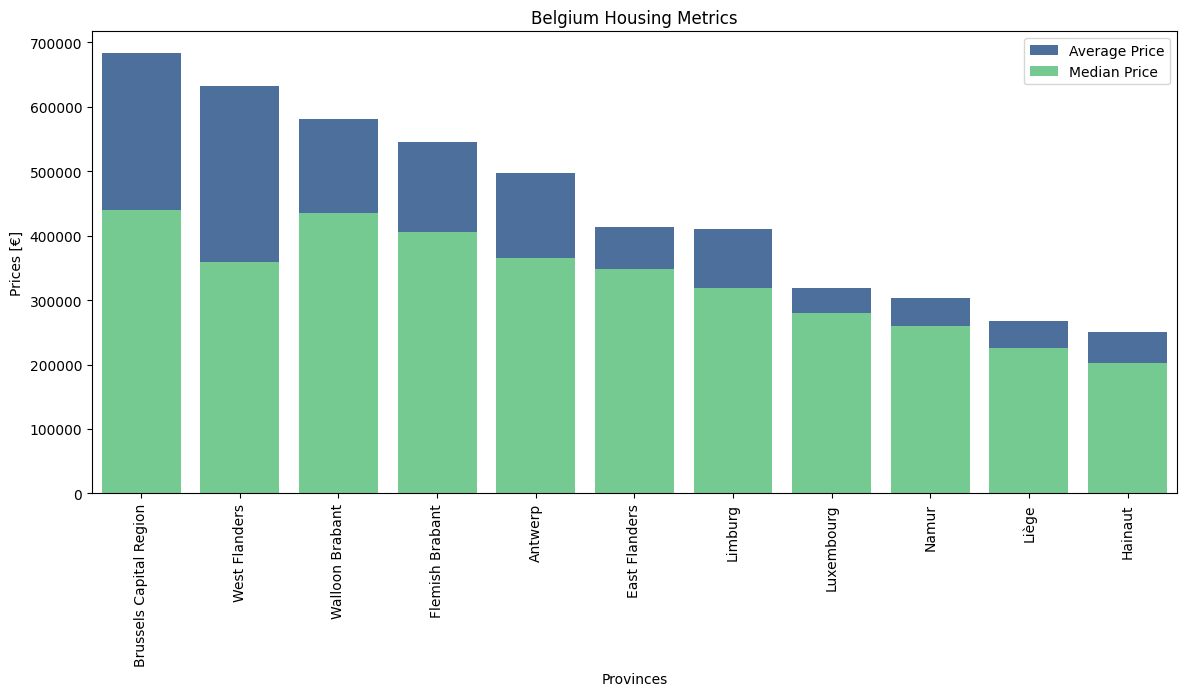

In [10]:
belgium_metrics = belgium_metrics.sort_values('Avg_Price',ascending=False)
plt.figure(figsize=(14, 6))
plt.xticks(rotation=90)
sns.barplot(data=belgium_metrics, x=belgium_metrics.index, y='Avg_Price', color='#3F6DA8', label='Average Price')
sns.barplot(data=belgium_metrics, x=belgium_metrics.index, y='Median_Price', color='#67D88E', label='Median Price')

# sns.barplot(data=belgium_metrics, x=belgium_metrics.index, y='Price_Per_Sq_Meter', color='red', label='Price per Sq. Meter')

plt.xlabel('Provinces')
plt.ylabel('Prices [€]')
plt.title('Belgium Housing Metrics')

plt.legend()
plt.show()

In [11]:
pd.set_option('display.float_format', '{:.2f}'.format)

print(f'Most expensive municipality in Belgium: {most_expensive_belgium}')
print(belgium_metrics.loc[most_expensive_belgium])
print(f'Least expensive municipality in Belgium: {least_expensive_belgium}')
print(belgium_metrics.loc[least_expensive_belgium])

print(f'Most expensive municipality in Flanders: {most_expensive_flanders}')
print(flanders_metrics.loc[most_expensive_flanders])
print(f'Least expensive municipality in Flanders: {least_expensive_flanders}')
print(flanders_metrics.loc[least_expensive_flanders])

print(f'Most expensive municipality in Wallonia: {most_expensive_wallonia}')
print(wallonia_metrics.loc[most_expensive_wallonia])
print(f'Least expensive municipality in Wallonia: {least_expensive_wallonia}')
print(wallonia_metrics.loc[least_expensive_wallonia])

print(f'Most expensive municipality in Brussels: {most_expensive_brussels}')
print(brussels_metrics.loc[most_expensive_brussels])
print(f'Least expensive municipality in Brussels: {least_expensive_brussels}')
print(brussels_metrics.loc[least_expensive_brussels])


Most expensive municipality in Belgium: Brussels Capital Region
Avg_Price            682773.87
Median_Price         440000.00
Price_Per_Sq_Meter     3884.83
Name: Brussels Capital Region, dtype: float64
Least expensive municipality in Belgium: Hainaut
Avg_Price            251081.68
Median_Price         202500.00
Price_Per_Sq_Meter     1622.17
Name: Hainaut, dtype: float64
Most expensive municipality in Flanders: West Flanders
Avg_Price            632345.78
Median_Price         359000.00
Price_Per_Sq_Meter     4875.91
Name: West Flanders, dtype: float64
Least expensive municipality in Flanders: Limburg
Avg_Price            410916.74
Median_Price         319000.00
Price_Per_Sq_Meter     2282.55
Name: Limburg, dtype: float64
Most expensive municipality in Wallonia: Walloon Brabant
Avg_Price            580771.98
Median_Price         435000.00
Price_Per_Sq_Meter     2909.52
Name: Walloon Brabant, dtype: float64
Least expensive municipality in Wallonia: Hainaut
Avg_Price            251081.68

In [13]:
from ipyleaflet import Map, Heatmap

# Step 1: Calculate the average price for each zip code
avg_prices = df.groupby('Zip')['Price'].mean()
# print(avg_prices.index)
# Step 2: Initialize the zip_coordinates dictionary
zip_coordinates = {}

# Step 3: Read and populate the zip_coordinates dictionary with coordinates from the "BE.txt" file
with open('zipcode-belgium.csv', 'r') as file:
    for line in file:
        data = line.split(',')
        zip_code = data[0]
        latitude = float(data[3])
        longitude = float(data[2])
        zip_coordinates[zip_code] = (latitude, longitude)
# print(zip_coordinates)
# print(avg_prices.keys())
# Step 4: Create a list of coordinates and average prices for the heatmap
heatmap_data = []
try:
    for i in zip_coordinates.items():
        if zip_coordinates.items() == avg_prices[zip_code]:
            print(zip_coordinates.items())
            latitude, longitude = zip_coordinates[zip_code]
            heatmap_data.append([latitude, longitude, avg_prices.loc(i)])
except:
    pass

# print(i)
# Step 5: Create the map with the heatmap overlay
m = Map(center=(50.5039, 4.4699), zoom=8)
heatmap_layer = Heatmap(locations=heatmap_data, radius=10, min_opacity=0.5, max_opacity=0.8)
m.add_layer(heatmap_layer)
m


Map(center=[50.5039, 4.4699], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoo…

In [29]:
from ipyleaflet import Map, Heatmap

# Step 1: Calculate the average price for each zip code
avg_prices = df.groupby('Zip')['Price'].mean()

# Step 2: Initialize the zip_coordinates dictionary
zip_coordinates = {}

# Step 3: Read and populate the zip_coordinates dictionary with coordinates from the "BE.txt" file
zip_data = pd.read_csv("zipcode-belgium.csv", names=["Zip","location","long","lat"])
zip_data = zip_data[["Zip","lat","long"]]
zip_data = zip_data.set_index("Zip")

# zip_coordinates[zip_code] = (latitude, longitude)

# Step 4: Create a list of coordinates and average prices for the heatmap
heatmap_data = []
print(zip_data)

for zip_code, avg_price in avg_prices.items():
    if zip_code in zip_coordinates:
        latitude, longitude = zip_data["lat","long"]
        print(latitude)
        heatmap_data.append([latitude, longitude, avg_price])

# Step 5: Create the map with the heatmap overlay
m = Map(center=(50.5039, 4.4699), zoom=8)
heatmap_layer = Heatmap(locations=heatmap_data, radius=10, min_opacity=0.5, max_opacity=0.8)
m.add_layer(heatmap_layer)
# m




       lat  long
Zip             
1000 50.85  4.35
1020 50.88  4.35
1030 50.87  4.37
1040 50.84  4.39
1050 50.82  4.38
...    ...   ...
9988 51.29  3.59
9988 51.28  3.63
9990 51.23  3.42
9991 51.20  3.49
9992 51.26  3.41

[2757 rows x 2 columns]


In [23]:
m

Map(center=[50.5039, 4.4699], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoo…

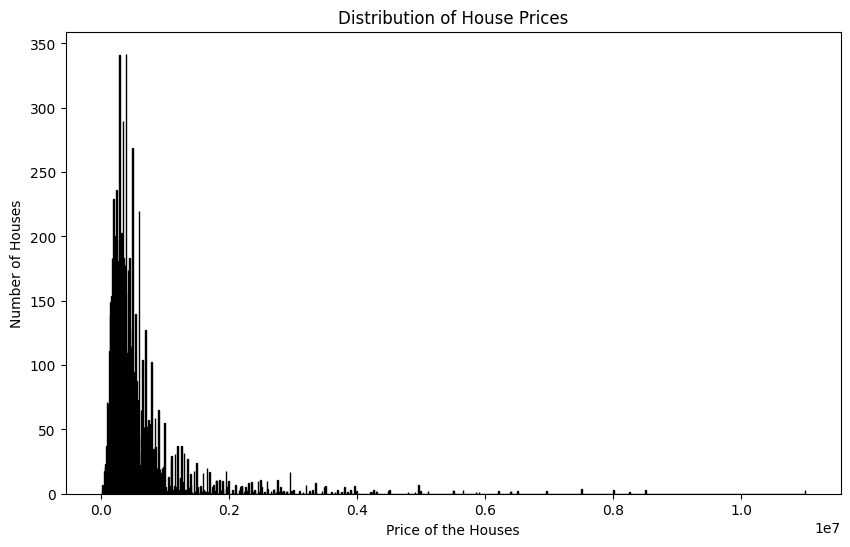

In [15]:
bins = range(0, df_houses['Price'].max() + 10000, 10000)


plt.figure(figsize=(10,6))
plt.hist(df_houses['Price'], bins=bins, edgecolor='black')

plt.title('Distribution of House Prices')
plt.xlabel('Price of the Houses')
plt.ylabel('Number of Houses')


plt.show()


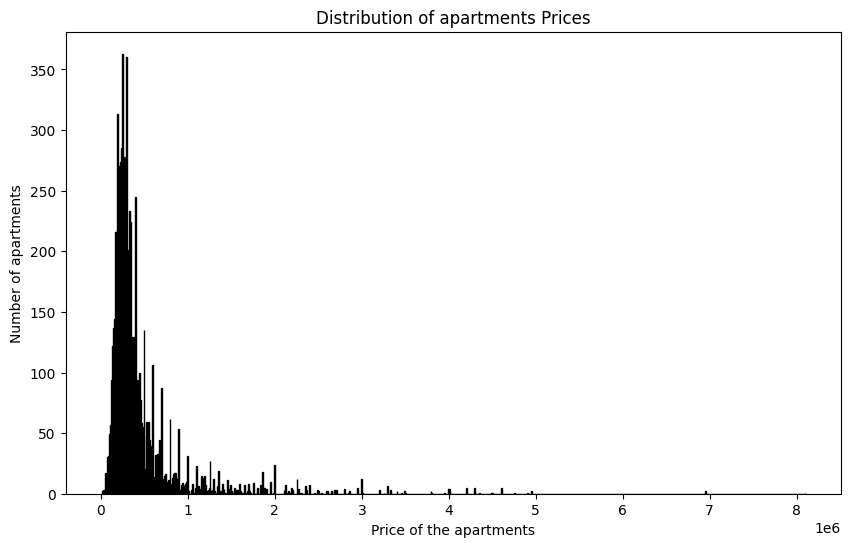

In [17]:

bins = range(0, df_apartments['Price'].max() + 10000, 10000)


plt.figure(figsize=(10,6))
plt.hist(df_apartments['Price'], bins=bins, edgecolor='black')

plt.title('Distribution of apartments Prices')
plt.xlabel('Price of the apartments')
plt.ylabel('Number of apartments')


plt.show()

In [70]:
df.shape

(18030, 25)